In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
df.Potability.unique()

array([0, 1], dtype=int64)

(10.5, -0.5)

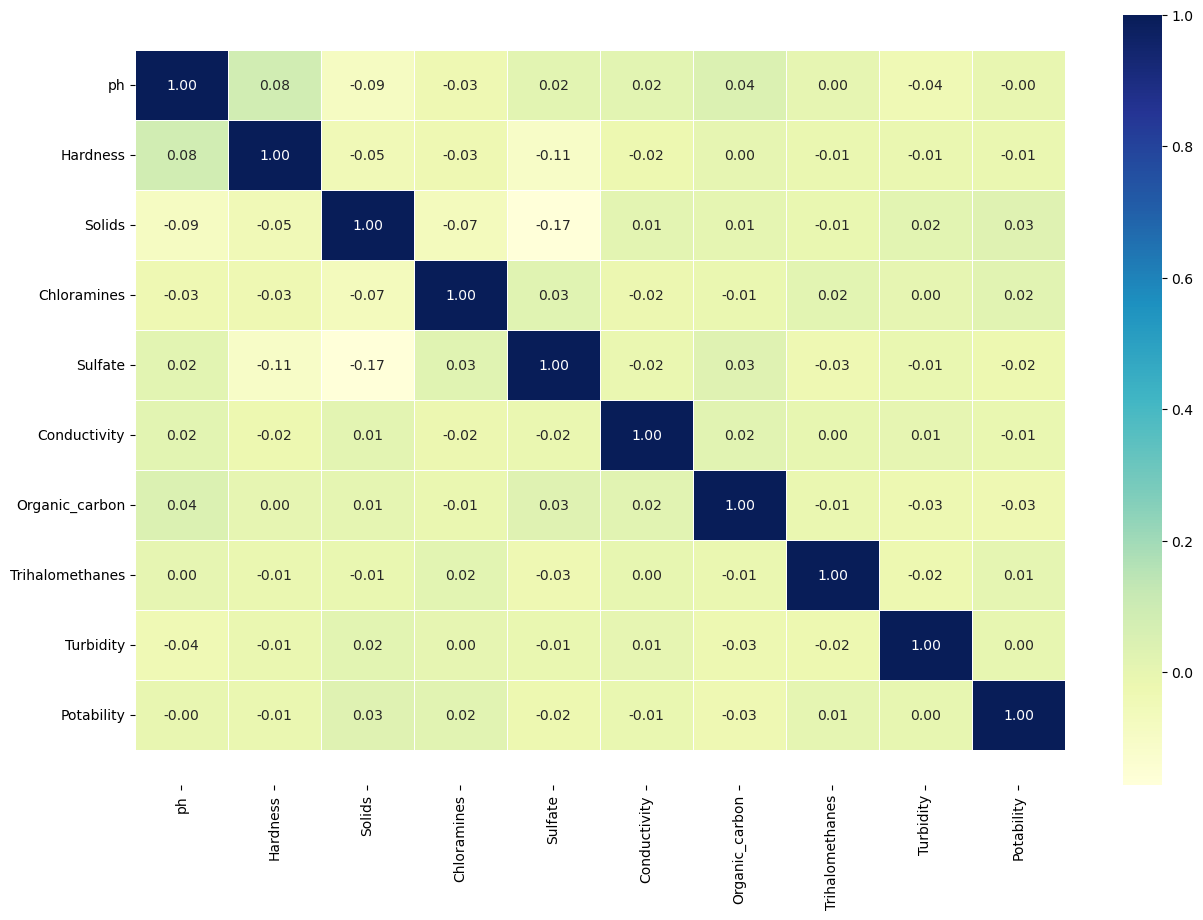

In [6]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

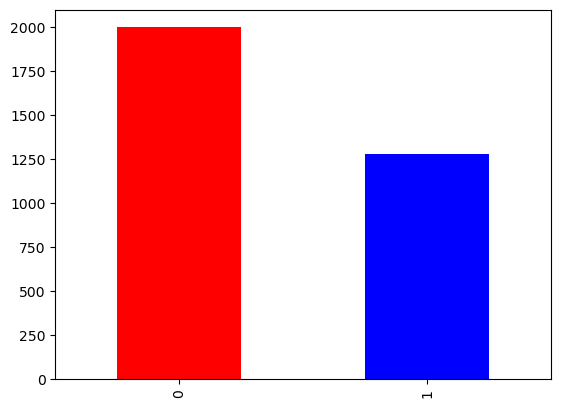

In [8]:
df["Potability"].value_counts().plot(kind="bar",color=["red", "blue"]);

In [9]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Potability')

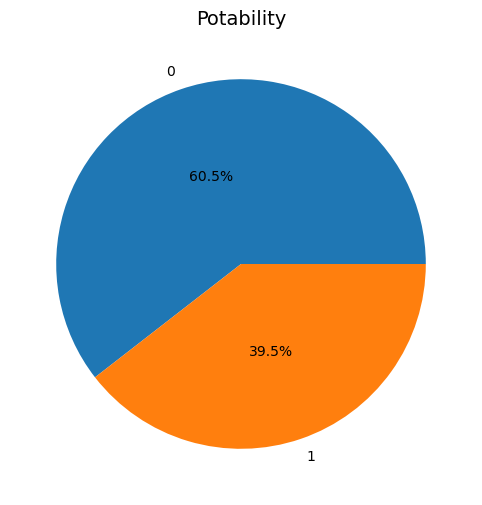

In [10]:
data = df.groupby("Potability")["ph"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Potability", fontsize=14)

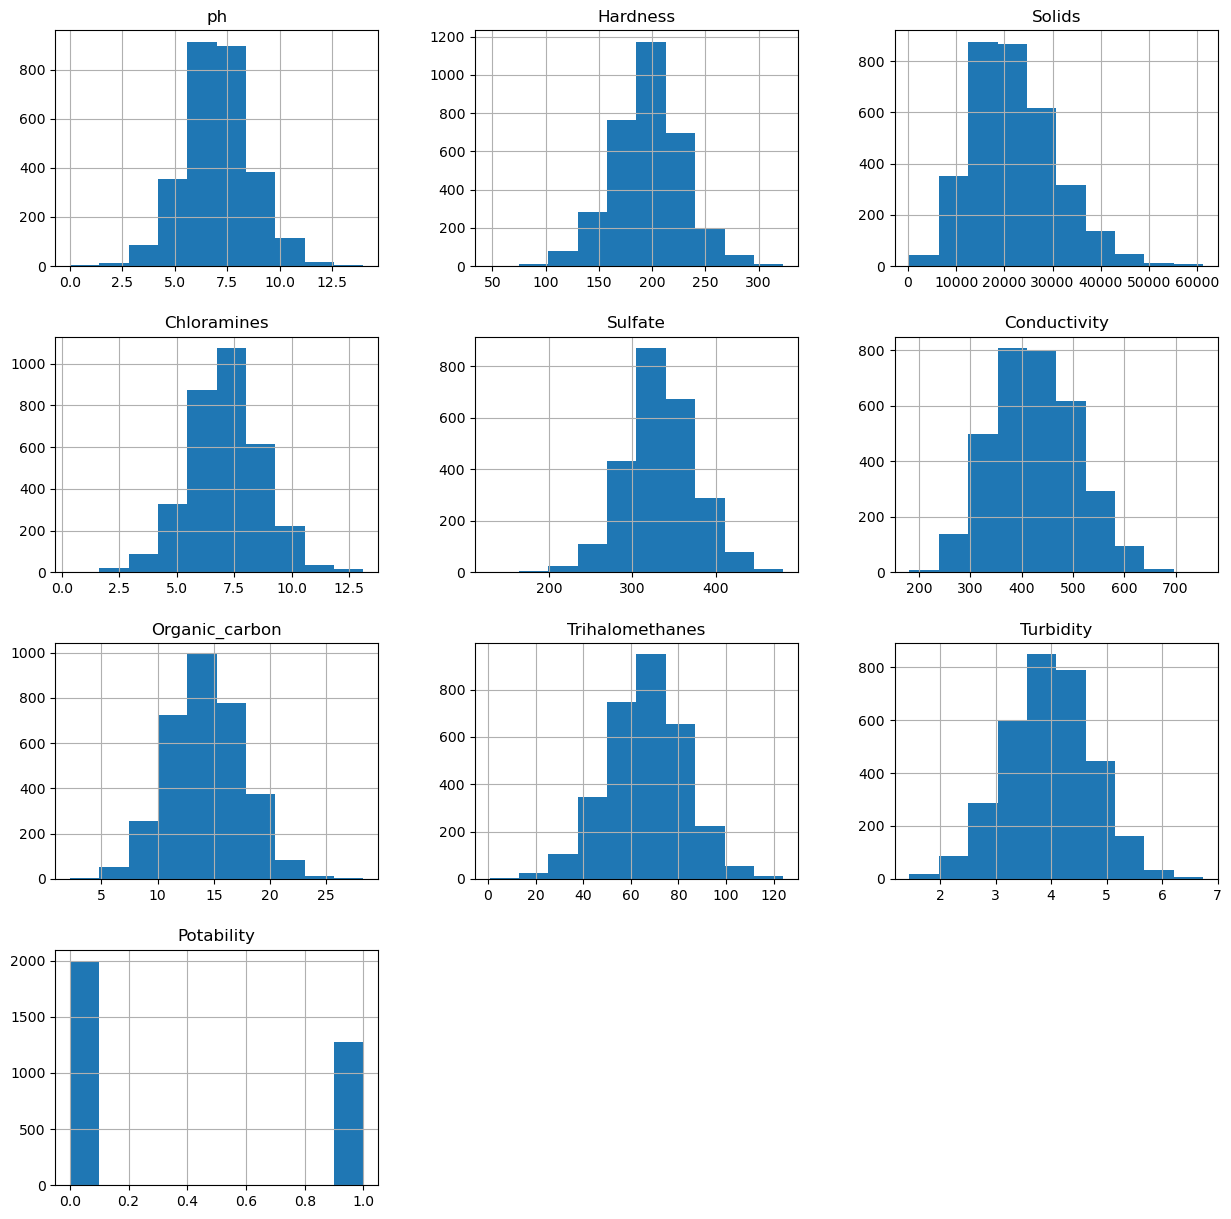

In [11]:
df.hist(figsize=(15,15))
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## eksik veri olan feature ların çıkarılması 


In [11]:
X=df.drop(["Potability","ph","Sulfate","Trihalomethanes"],axis=1)
y=df.Potability

In [12]:
X

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075
...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

## RandomForestClassifier ile model kurulması

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [165]:
mdl=RandomForestClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

search_space = [{'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [200,300,400,500],
                 'Classifier__max_features': np.arange(1,7)}]

 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   RandomForestClassifier(max_features=4, n_estimators=400, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': RandomForestClassifier(max_features=4, n_estimators=400, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 4,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 400,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 42,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [16]:
mdl= RandomForestClassifier(max_features=4, n_estimators=400, random_state=42,oob_score=True)
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6021341463414634


In [17]:
results = pd.DataFrame([], columns = ["Accuracy"])
results.loc["DropNA-RFC"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134


## KNN ile model kurulması

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [169]:
mdl=KNeighborsClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',KNeighborsClassifier())])

search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':np.arange(1,7)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier', KNeighborsClassifier(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': KNeighborsClassifier(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 4,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_trainStandard,y_train)
ypred=knn.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.5853658536585366


In [20]:

results.loc["DropNA-KNN"] = [accuracy_score(y_test, ypred)]
results


,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366


## Logistic Regression ile model kurulması

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [173]:
mdl=LogisticRegression()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',LogisticRegression())])

search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 100),
                 'Classifier__penalty':['l1','l2']}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.0001, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.0001, penalty='l1', solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.0001,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [22]:
mdl=LogisticRegression(solver="liblinear",max_iter=1000,C=0.0001,penalty="l1")
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6097560975609756


In [23]:

results.loc["DropNA-LR"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756


## Summary

Eksik verilerin olduğu featureları datadan çıkarmamız durumunda uyguladığımız 3 modelden en iyi sonucu Logistic Regression ile elde ettik.

## EKSİK VERİLERİN MEAN DEĞERLERLE DOLDURULMASI


In [12]:
miss_percent=df.isnull().mean()

In [13]:
miss_percent

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [14]:
df.ph.mean()

7.080794504276819

In [15]:
df["ph"]=df.ph.fillna(df.ph.mean())

In [16]:
df.ph.isna().sum()

0

In [17]:
df["Sulfate"]=df.Sulfate.fillna(df.Sulfate.mean())

In [18]:
df.Sulfate.isna().sum()

0

In [19]:
df["Trihalomethanes"]=df.Trihalomethanes.fillna(df.Trihalomethanes.mean())

In [20]:
df.Trihalomethanes.isna().sum()

0

In [21]:
X=df.drop("Potability",axis=1)
y=df.Potability

In [22]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [191]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k = "all")
selector.fit(X_train, y_train)

f_values = pd.Series(selector.scores_, index = X_train.columns)
f_values = f_values.sort_values(ascending=False)
f_values

Solids             1.999819
Chloramines        0.804501
Organic_carbon     0.446335
Sulfate            0.441589
ph                 0.250824
Trihalomethanes    0.040952
Conductivity       0.018222
Hardness           0.013873
Turbidity          0.005797
dtype: float64

## RandomForestClassifier ile model kurulması

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
mdl=RandomForestClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

search_space = [{'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [200,200,300,400,500],
                 'Classifier__max_features': np.arange(1,10)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   RandomForestClassifier(max_features=7, n_estimators=200, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': RandomForestClassifier(max_features=7, n_estimators=200, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 7,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 200,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 42,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [36]:
mdl= RandomForestClassifier(max_features=7, n_estimators=200, random_state=42,oob_score=True)
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6722560975609756


In [37]:

results.loc["FillMean-RFC"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256


## KNN ile model kurulması

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [201]:
mdl=KNeighborsClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',KNeighborsClassifier())])

search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':np.arange(1,10)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier', KNeighborsClassifier(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': KNeighborsClassifier(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 4,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_trainStandard,y_train)
ypred=knn.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6387195121951219


In [40]:
results.loc["FillMean-KNN"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720


## logisticRegression ile model kurulması

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [225]:
mdl=LogisticRegression()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',LogisticRegression())])

search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 100),
                 'Classifier__penalty':['l1','l2']}]

 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.015199110829529346, solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.015199110829529346, solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.015199110829529346,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l2',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [42]:
mdl=LogisticRegression(solver="liblinear",max_iter=1000,C=0.015199110829529346,penalty="l2")
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6097560975609756


In [43]:
results.loc["FillMean-LR"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756


## fillna(mean) Summary

Eksik verilerin mean değerlerle doldurulması durumunda 3 modelden en iyi RandomForestClassifier ile sonuç aldık

## EKSİK VERİLERİN YERİNİN MEDIAN DEĞER İLE DOLDURULMASI

In [58]:
df.ph.median()

7.036752103833548

In [59]:
df["ph"]=df.ph.fillna(df.ph.median())

In [60]:
df.ph.isna().sum()

0

In [61]:
df["Sulfate"]=df.Sulfate.fillna(df.Sulfate.median())

In [62]:
df.Sulfate.isna().sum()

0

In [63]:
df["Trihalomethanes"]=df.Trihalomethanes.fillna(df.Trihalomethanes.median())

In [64]:
df.Trihalomethanes.isna().sum()

0

In [65]:
X=df.drop("Potability",axis=1)
y=df.Potability

## RandomForestClassifier ile model kurulması

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [67]:
mdl=RandomForestClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

search_space = [{'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [200,300,400,500],
                 'Classifier__max_features': np.arange(1,10)}]

clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   RandomForestClassifier(max_features=6, n_estimators=200, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': RandomForestClassifier(max_features=6, n_estimators=200, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 6,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 200,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 42,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [69]:
mdl= RandomForestClassifier(max_features=6, n_estimators=200, random_state=42,oob_score=True)
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6646341463414634


In [70]:
results.loc["FillMedian-RFC"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634


## KNeighborsClassifier ile Model kurulması

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [71]:
mdl=KNeighborsClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',KNeighborsClassifier())])

search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':np.arange(1,10)}]
 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier', KNeighborsClassifier(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': KNeighborsClassifier(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 4,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [72]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [73]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_trainStandard,y_train)
ypred=knn.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6402439024390244


In [74]:
results.loc["FillMedian-KNN"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634
FillMedian-KNN,0.640244


## LogisticRegression ile Model Kurulması

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [81]:
mdl=LogisticRegression()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',LogisticRegression())])

search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-3, 3, 100),
                 'Classifier__penalty':['l1','l2']}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.014174741629268055, solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.014174741629268055, solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.014174741629268055,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l2',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [83]:
mdl=LogisticRegression(solver="liblinear",max_iter=1000,C=0.014174741629268055,penalty="l2")
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6097560975609756


In [80]:
results.loc["FillMedian-LR"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634
FillMedian-KNN,0.640244
FillMedian-LR,0.609756


## fillna(median) Summary

Eksik verilerin yerine median değerlerin konulması durumunda 3 modelden en iyi sonucu Random Forest Classifier ile elde ettik.

## EKSİK VERİLERİN O İLE DOLDURULMASI


In [87]:
df["ph"]=df.ph.fillna(0)
df["Sulfate"]=df.Sulfate.fillna(0)
df["Trihalomethanes"]=df.Trihalomethanes.fillna(0)

In [88]:
X=df.drop("Potability",axis=1)
y=df.Potability

In [89]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658


In [90]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

## RandomForestClassifier ile model kurulması

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [92]:
mdl=RandomForestClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

search_space = [{'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [200,300,400,500],
                 'Classifier__max_features': np.arange(1,10)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   RandomForestClassifier(max_features=4, n_estimators=500, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': RandomForestClassifier(max_features=4, n_estimators=500, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 4,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 500,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 42,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [94]:
mdl= RandomForestClassifier(max_features=4, n_estimators=500, random_state=42,oob_score=True)
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6707317073170732


In [95]:
results.loc["FillNA(0)-RFC"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634
FillMedian-KNN,0.640244
FillMedian-LR,0.609756
FillNA(0)-RFC,0.670732


## KNeighborsClassifier ile model kurulması

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [96]:
mdl=KNeighborsClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',KNeighborsClassifier())])

search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':np.arange(1,10)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': KNeighborsClassifier(n_neighbors=8),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 8,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [98]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_trainStandard,y_train)
ypred=knn.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.5945121951219512


In [99]:
results.loc["FillNA(0)-KNN"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634
FillMedian-KNN,0.640244
FillMedian-LR,0.609756
FillNA(0)-RFC,0.670732


## LogisticRegression ile Model Kurulması

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [100]:
mdl=LogisticRegression()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',LogisticRegression())])

search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 100),
                 'Classifier__penalty':['l1','l2']}]

 
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl = clf.fit(X_train, y_train)

mdl.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   LogisticRegression(C=0.0001, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': LogisticRegression(C=0.0001, penalty='l1', solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__C': 0.0001,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [102]:
mdl=LogisticRegression(solver="liblinear",max_iter=1000,C=0.0001,penalty="l1")
mdl.fit(X_trainStandard,y_train)
ypred=mdl.predict(X_testStandard)
print("Accuracy:",accuracy_score(y_test, ypred))

Accuracy: 0.6097560975609756


In [103]:
results.loc["FillNA(0)-LR"] = [accuracy_score(y_test, ypred)]
results

,Accuracy
DropNA-RFC,0.602134
DropNA-KNN,0.585366
DropNA-LR,0.609756
FillMean-RFC,0.672256
FillMean-KNN,0.638720
FillMean-LR,0.609756
FillMedian-RFC,0.664634
FillMedian-KNN,0.640244
FillMedian-LR,0.609756
FillNA(0)-RFC,0.670732


## fillna(0) Summary

Eksik verilerin 0 ile doldurulması durumunda uyguladığımız 3 modelden en iyi sonucu Rndom Forest Classifier ile elde ettik

In [39]:
df=pd.read_csv("water_potability.csv")

In [40]:
df["ph"]=df.ph.fillna(df.ph.mean())
df["Sulfate"]=df.Sulfate.fillna(df.Sulfate.mean())
df["Trihalomethanes"]=df.Trihalomethanes.fillna(df.Trihalomethanes.mean())

In [41]:
X=df.drop("Potability",axis=1)
y=df.Potability

In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [45]:
mdl=RandomForestClassifier()

pipe = Pipeline([('scaler', StandardScaler()),('Classifier',RandomForestClassifier())])

search_space = [{'Classifier': [RandomForestClassifier(random_state=42)],
                 'Classifier__n_estimators': [100,200,300,400],
                 'Classifier__max_features': np.arange(1,10)}]


clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=3), 
                verbose=0,scoring="accuracy")

mdl_smote = clf.fit(X_sm, y_sm)

mdl_smote.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('Classifier',
   RandomForestClassifier(max_features=5, n_estimators=300, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'Classifier': RandomForestClassifier(max_features=5, n_estimators=300, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 5,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 300,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 42,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [63]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)

In [65]:
mdl_smote= RandomForestClassifier(max_features=5, n_estimators=300, random_state=42,oob_score=True)
mdl_smote.fit(X_train_smote,y_train_smote)
ypred_smote=mdl_smote.predict(X_test_smote)

In [67]:
print("Accuracy:",accuracy_score(y_test_smote, ypred_smote))

Accuracy: 0.7325


Text(0.5, 14.722222222222216, 'Predicted')

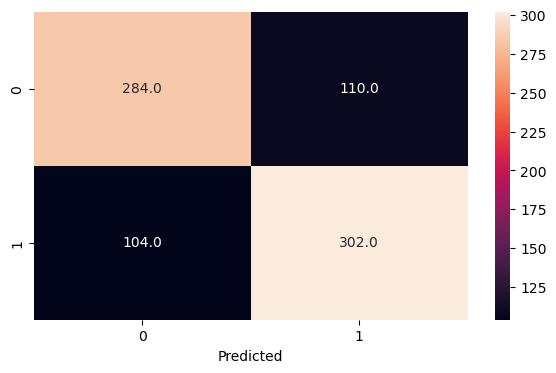

In [68]:
cm = confusion_matrix(y_test_smote,ypred_smote)
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [61]:
print(classification_report(y_test_smote,ypred_smote))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       394
           1       0.73      0.74      0.74       406

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800



In [62]:
mdl= RandomForestClassifier(max_features=5, n_estimators=300, random_state=42,oob_score=True)
mdl.fit(X,y)

RandomForestClassifier(max_features=5, n_estimators=300, oob_score=True,
                       random_state=42)

## GENERAL SUMMARY

Data hazırlamak için 4 ayrı yaklaşım yapıldı.

1- Eksik verilerin bulunduğu featureların fdatadan çıkarılması
2- Eksik verilerin yerine mean değerlerin konulması
3- Eksik verilerin yerine median değerlerin konulması
4- Eksik verilerin yerine 0 konulması

-Her 4 durum için 3 ayrı model fit edildi. (Logistic Regression, Random Forest Classifier, KNeighbors Classifier)
-En iyi sonuçların elde edildiği durum eksik verilerin yerine mean değerlerin konulması oldu.(train ve test e böldüğümüz datada f_regression değerleri ile featureların data üzerindeki önemleri sıralandı, eksik veri bulunan featureların datadan çıkarılması accuracy score unu düşürdüğü görüldü)
-Mean değerlerle çalışılarak en iyi sonucu veren model Random Forest Classifier oldu. imlearn kütüphanesini indirip 0=1998 1=1298 olan target değerlerini her birini 1998 olarak eşitlemeyi düşündük ve skor değerini 0.6722 den 0.7325 e çıkardık.

